# Posttest 8

        Nama : Rianawati
        NIM  : 2009106132
        Kelas: C2 20

Mengimport Package yang dibutuhkan

In [1]:
import tensorflow as tf
import tensorflow.keras.datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Me-load dataset

In [ ]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tfds.fashion_mnist.load_data()

Menampilkan panjang data testing dan training

In [3]:
print(f'panjang x train : {len(x_train_raw)}',
    f'panjang y train : {len(y_train_raw)}',
    f'panjang x test : {len(x_test_raw)}',
    f'panjang y test : {len(y_test_raw)}',
    sep='\n')

panjang x train : 60000
panjang y train : 60000
panjang x test : 10000
panjang y test : 10000


Menampilkan gambar yang ke-12

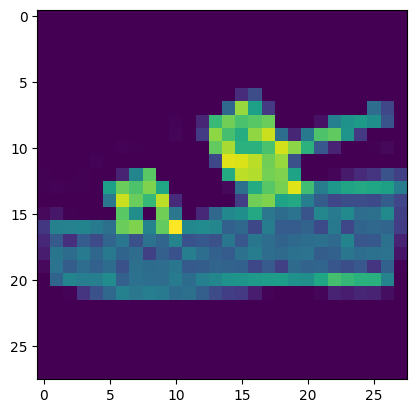

In [5]:
plt.imshow(x_train_raw[12])

In [6]:
num_class = len(np.unique(y_train_raw))
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_class)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
x_train_raw.shape

(60000, 28, 28)

MengReshape Gambar

In [8]:
x_train = tf.reshape(x_train_raw, [60000, 784])
x_test = tf.reshape(x_test_raw, [10000, 784])

In [9]:
x_train = tf.cast(x_train, tf.float32)/300
x_test = tf.cast(x_test, tf.float32)/300

Membuat model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim = 784),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

Training Model

In [14]:
history = model.fit(
    x_train, y_train,
    epochs =30, steps_per_epoch=10,
    verbose =2,
    validation_data=(x_test, y_test)
)

Epoch 1/30
10/10 - 1s - loss: 0.4319 - accuracy: 0.8514 - val_loss: 0.4621 - val_accuracy: 0.8401 - 736ms/epoch - 74ms/step
Epoch 2/30
10/10 - 0s - loss: 0.4275 - accuracy: 0.8521 - val_loss: 0.4625 - val_accuracy: 0.8400 - 499ms/epoch - 50ms/step
Epoch 3/30
10/10 - 0s - loss: 0.4241 - accuracy: 0.8534 - val_loss: 0.4583 - val_accuracy: 0.8404 - 484ms/epoch - 48ms/step
Epoch 4/30
10/10 - 0s - loss: 0.4185 - accuracy: 0.8551 - val_loss: 0.4514 - val_accuracy: 0.8426 - 476ms/epoch - 48ms/step
Epoch 5/30
10/10 - 1s - loss: 0.4131 - accuracy: 0.8575 - val_loss: 0.4480 - val_accuracy: 0.8446 - 502ms/epoch - 50ms/step
Epoch 6/30
10/10 - 1s - loss: 0.4098 - accuracy: 0.8583 - val_loss: 0.4468 - val_accuracy: 0.8447 - 507ms/epoch - 51ms/step
Epoch 7/30
10/10 - 1s - loss: 0.4060 - accuracy: 0.8597 - val_loss: 0.4432 - val_accuracy: 0.8458 - 556ms/epoch - 56ms/step
Epoch 8/30
10/10 - 1s - loss: 0.4025 - accuracy: 0.8613 - val_loss: 0.4429 - val_accuracy: 0.8463 - 529ms/epoch - 53ms/step
Epoch 9/

History

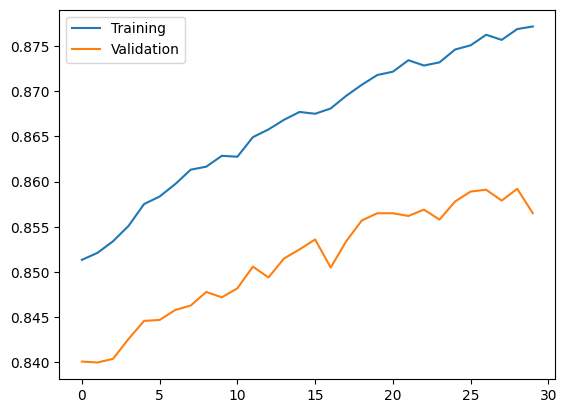

In [15]:
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'],label='Training')
plt.plot(nilai_x, history.history['val_accuracy'],label='Validation')
plt.legend()
plt.show()

In [16]:
model.save('model/model.h5')

In [17]:
model_saved = tf.keras.models.load_model('model/model.h5')
model_saved.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


mengEvaluasi Model

In [18]:
model_saved.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 1ms/step - loss: 0.4069 - accuracy: 0.8565


[0.40690889954566956, 0.8565000295639038]

In [19]:
hasil = model_saved.predict(x_train)

1875/1875 [==============================] - 2s 1ms/step


In [20]:
hasil

array([[1.39181875e-08, 5.11151572e-11, 6.18957177e-11, ...,
        1.85124855e-03, 3.47501569e-04, 9.97764587e-01],
       [9.84844029e-01, 8.65722484e-07, 1.30669228e-04, ...,
        5.46548473e-10, 1.35477137e-06, 8.01188715e-09],
       [3.99510682e-01, 4.82765362e-02, 3.77281606e-02, ...,
        1.86580559e-03, 7.72751123e-03, 5.95745631e-04],
       ...,
       [2.47036602e-04, 3.04370944e-04, 1.03448227e-04, ...,
        1.62586261e-07, 2.35167008e-05, 1.26845165e-07],
       [6.11429334e-01, 7.21833808e-03, 1.32488102e-01, ...,
        1.63300676e-04, 8.75726808e-03, 6.73961040e-05],
       [5.12411410e-04, 6.21059689e-06, 3.28490423e-05, ...,
        1.85711216e-03, 5.97068225e-04, 2.30575359e-04]], dtype=float32)

In [21]:
x_train.shape

TensorShape([60000, 784])

In [22]:
hasil.shape

(60000, 10)

In [23]:
tf.argmax(hasil[2]).numpy()

0

In [24]:
np.unique(y_train_raw)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

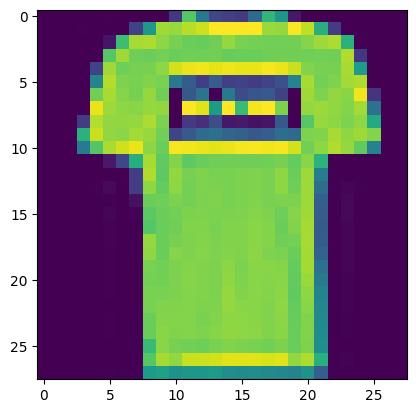

In [25]:
plt.imshow(x_train_raw[1])